# Lab 6
Compute z-transform from the given transfer function and its ROC. Compute 
rational z-transform from the given poles and zeros

In [ ]:
!pip install numpy scipy matplotlib sympy

Numerator coefficients (b): [ 1.  -0.5]
Denominator coefficients (a): [ 1.  -0.8]
Region of Convergence (ROC): |z| > 0.8


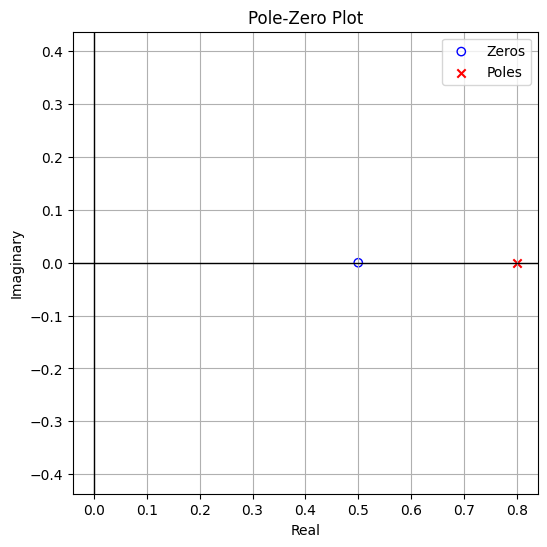


Symbolic Transfer Function H(z):
1.0⋅z - 0.5
───────────
1.0⋅z - 0.8

Impulse Response (first 10 samples):
h[0] = 1.0000
h[1] = 0.3000
h[2] = 0.2400
h[3] = 0.1920
h[4] = 0.1536
h[5] = 0.1229
h[6] = 0.0983
h[7] = 0.0786
h[8] = 0.0629
h[9] = 0.0503


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp

# -----------------------------
# USER INPUTS
# -----------------------------

# Define zeros, poles, and gain
zeros = [0.5]             # list of zeros
poles = [0.8]             # list of poles
gain = 1                  # gain (K)

# Define ROC (example): |z| > max(|poles|) => causal and stable system
roc = f"|z| > {max(abs(p) for p in poles)}"

# -----------------------------
# COMPUTE TRANSFER FUNCTION
# -----------------------------

# Convert zeros and poles to numerator and denominator coefficients
b, a = signal.zpk2tf(zeros, poles, gain)

print("Numerator coefficients (b):", b)
print("Denominator coefficients (a):", a)
print("Region of Convergence (ROC):", roc)

# -----------------------------
# PLOT POLE-ZERO DIAGRAM
# -----------------------------

def plot_pz(zeros, poles):
    plt.figure(figsize=(6, 6))
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    
    # Unit circle
    uc = plt.Circle((0,0), 1, color='gray', fill=False, linestyle='dashed')
    plt.gca().add_artist(uc)

    # Plot zeros and poles
    plt.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none', edgecolors='b', label='Zeros')
    plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Poles')
    
    plt.title("Pole-Zero Plot")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.grid(True)
    plt.legend()
    plt.axis("equal")
    plt.show()

plot_pz(zeros, poles)

# -----------------------------
# SYMBOLIC Z-TRANSFORM EXPRESSION (Optional)
# -----------------------------

z = sp.symbols('z', complex=True)
num_expr = sum([b[i] * z**(-i) for i in range(len(b))])
den_expr = sum([a[i] * z**(-i) for i in range(len(a))])
H_z = sp.simplify(num_expr / den_expr)

print("\nSymbolic Transfer Function H(z):")
sp.pprint(H_z)

# -----------------------------
# INVERSE Z-TRANSFORM (Impulse Response)
# -----------------------------

# Compute impulse response using signal.dimpulse
system = (b, a, 1)  # (numerator, denominator, sampling time)
t, h = signal.dimpulse(system, n=10)
h = np.squeeze(h)

print("\nImpulse Response (first 10 samples):")
for i, val in enumerate(h):
    print(f"h[{i}] = {val:.4f}")


In [20]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def input_polynomial(name):
    print(f"\nEnter the {name} terms:")

    num_terms = int(input(f"How many terms in the {name}? "))
    coeffs = []
    powers = []

    for i in range(num_terms):
        c = float(input(f"  Coefficient of term {i+1}: "))
        p = int(input(f"  Power of z for term {i+1}: "))
        coeffs.append((p, c))

    # Sort by descending powers
    coeffs.sort(reverse=True)
    max_power = coeffs[0][0]
    min_power = coeffs[-1][0]

    poly = [0] * (max_power - min_power + 1)
    for p, c in coeffs:
        poly[max_power - p] = c

    return poly

def compute_poles_zeros(num, den):
    zeros = np.roots(num)
    poles = np.roots(den)
    return zeros, poles

def print_transfer_function(num, den):
    print("\nTransfer Function H(z):")
    print("Numerator:   ", np.poly1d(num))
    print("Denominator: ", np.poly1d(den))

def determine_ROC(poles):
    max_pole_radius = max(np.abs(poles))
    print("\nAssuming causal system (ROC: |z| > max(|poles|)):")
    print(f"  Poles magnitude: {[round(abs(p), 4) for p in poles]}")
    print(f"  ROC: |z| > {round(max_pole_radius, 4)}")

def main():
    print("---- INPUT TRANSFER FUNCTION H(z) = N(z) / D(z) ----")
    num = input_polynomial("numerator")
    den = input_polynomial("denominator")

    print_transfer_function(num, den)

    zeros, poles = compute_poles_zeros(num, den)
    print("\nZeros:", np.round(zeros, 4))

    plot_pole_zero(zeros, poles)


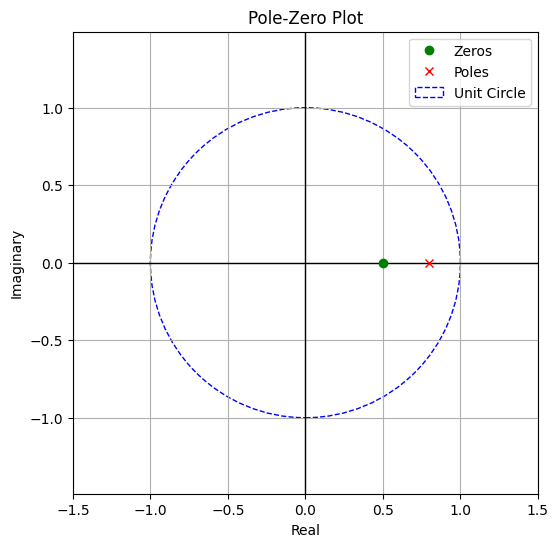

In [21]:
def plot_pole_zero(zeros, poles):
    plt.figure(figsize=(6, 6))
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.plot(np.real(zeros), np.imag(zeros), 'go', label='Zeros')
    plt.plot(np.real(poles), np.imag(poles), 'rx', label='Poles')

    unit_circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='dashed', label='Unit Circle')
    plt.gca().add_artist(unit_circle)

    plt.title('Pole-Zero Plot')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid(True)

    # Fix: set limits to show the unit circle well
    plt.axis('equal')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)

    plt.legend()
    plt.show()
plot_pole_zero(zeros, poles)

In [16]:
main()

---- INPUT TRANSFER FUNCTION H(z) = N(z) / D(z) ----

Enter the numerator terms:


How many terms in the numerator?  2
  Coefficient of term 1:  1
  Power of z for term 1:  0
  Coefficient of term 2:  0.5
  Power of z for term 2:  -1



Enter the denominator terms:


How many terms in the denominator?  2
  Coefficient of term 1:  2
  Power of z for term 1:  0
  Coefficient of term 2:  1.6
  Power of z for term 2:  -1



Transfer Function H(z):
Numerator:     
1 x + 0.5
Denominator:   
2 x + 1.6

Zeros: [-0.5]


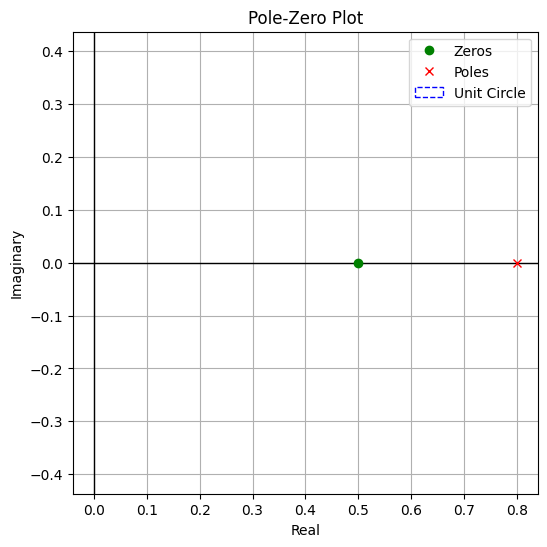

In [17]:
plot_pole_zero(zeros, poles)